# RA and Dec Coordinate Range to Priors

In [3]:
# importing plotting and locus tools
import LocusTools as lt
import BayesTools as bt
import PlotTools as pt
import MakePriors as mp

In [2]:
import sys
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import optimize
from scipy import interpolate
from scipy.interpolate import griddata
from scipy.stats import gaussian_kde
from dl import authClient as ac, queryClient as qc
from dl.helpers.utils import convert
from getpass import getpass
import pandas as pd
import healpy as hp
import numpy as np

In [34]:
#define global variables
nside=32
min_ra=0
max_ra=4
min_dec=0
max_dec=4

In [35]:
from ListHealpixel import list_healpixel
lh = list_healpixel(nside, min_ra, max_ra, min_dec, max_dec)
pixel_array = lh.pixelsinrange
print(pixel_array)

[5697, 5824, 5953]


In [36]:
#create list that holds the nested256_array for each healpixel called 
nested256_arrays = []

# Iterate over the pixel_array
for pixelnumber in pixel_array:
    npixratio = hp.nside2npix(256)/hp.nside2npix(nside)
    start = npixratio * pixelnumber
    stop = start + npixratio
    nested256_array = np.arange(start, stop, 1, dtype=int)
    nested256_arrays.append(nested256_array)

# nested256_arrays now holds the results for each pixelnumber in pixel_array
for i, nested256_array in enumerate(nested256_arrays):
    print(f"Pixel number {pixel_array[i]}: {nested256_array}")

Pixel number 5697: [364608 364609 364610 364611 364612 364613 364614 364615 364616 364617
 364618 364619 364620 364621 364622 364623 364624 364625 364626 364627
 364628 364629 364630 364631 364632 364633 364634 364635 364636 364637
 364638 364639 364640 364641 364642 364643 364644 364645 364646 364647
 364648 364649 364650 364651 364652 364653 364654 364655 364656 364657
 364658 364659 364660 364661 364662 364663 364664 364665 364666 364667
 364668 364669 364670 364671]
Pixel number 5824: [372736 372737 372738 372739 372740 372741 372742 372743 372744 372745
 372746 372747 372748 372749 372750 372751 372752 372753 372754 372755
 372756 372757 372758 372759 372760 372761 372762 372763 372764 372765
 372766 372767 372768 372769 372770 372771 372772 372773 372774 372775
 372776 372777 372778 372779 372780 372781 372782 372783 372784 372785
 372786 372787 372788 372789 372790 372791 372792 372793 372794 372795
 372796 372797 372798 372799]
Pixel number 5953: [380992 380993 380994 380995 38

In [ ]:
#convert array from nested to ring healpixel numbering
combined_array = np.concatenate(nested256_arrays)
ring256_array = hp.nest2ring(256, combined_array)
ring256_array

In [38]:
def makeQueryString(ring256):
    query1 = """
    SELECT ra, dec, gall, galb, gc, logage, mass, label, logg, m_h, av, mu0, umag, gmag, rmag, imag, zmag, ymag, nest4096, ring256
    FROM lsst_sim.simdr2
    WHERE"""
    query = query1 + f" ring256 = {ring256}"
    return query

for ring256 in ring256_array:
    querystring = makeQueryString(ring256)
    nested_patch = mp.retrievePatch(querystring)


querying...
converting...
retrieved patch with 1979  entries
querying...
converting...
retrieved patch with 2110  entries
querying...
converting...
retrieved patch with 2142  entries
querying...
converting...
retrieved patch with 2120  entries
querying...
converting...
retrieved patch with 2112  entries
querying...
converting...
retrieved patch with 2121  entries
querying...
converting...
retrieved patch with 2104  entries
querying...
converting...
retrieved patch with 2163  entries
querying...
converting...
retrieved patch with 2056  entries
querying...
converting...
retrieved patch with 2060  entries
querying...
converting...
retrieved patch with 2087  entries
querying...
converting...
retrieved patch with 2053  entries
querying...
converting...
retrieved patch with 2062  entries
querying...
converting...
retrieved patch with 2144  entries
querying...
converting...
retrieved patch with 2161  entries
querying...
converting...
retrieved patch with 2234  entries
querying...
converting..

r= 13.5 to 14.5 N= 293952 Ns= 736


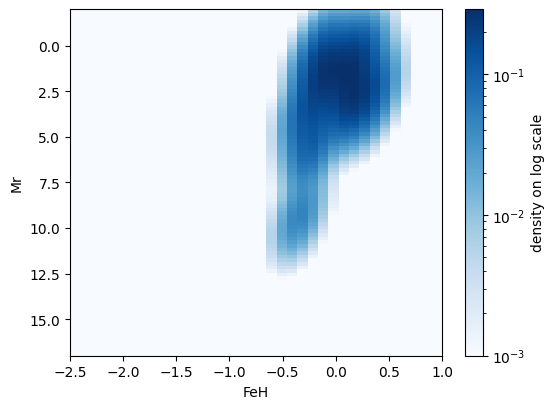

r= 14.0 to 15.0 N= 293952 Ns= 1408


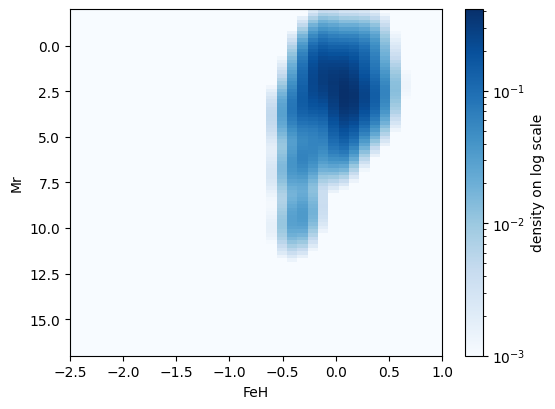

r= 14.5 to 15.5 N= 293952 Ns= 1920


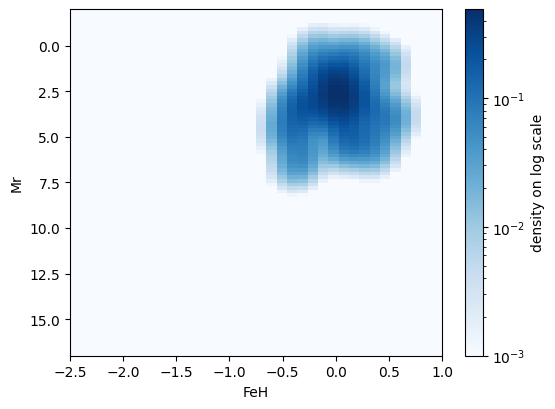

r= 15.0 to 16.0 N= 293952 Ns= 2368


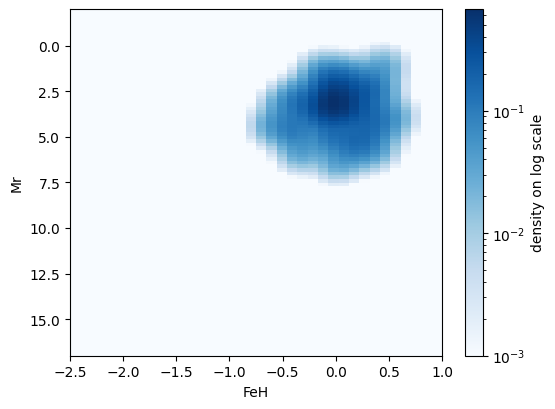

r= 15.5 to 16.5 N= 293952 Ns= 3424


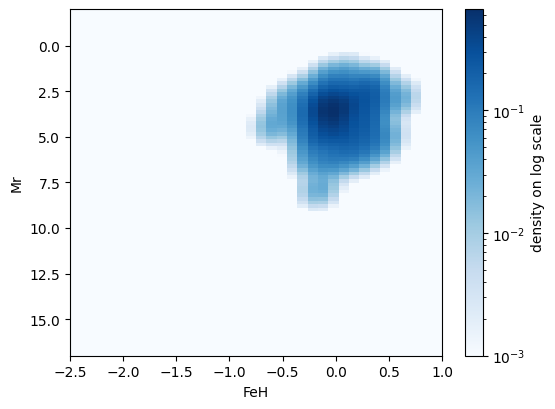

r= 16.0 to 17.0 N= 293952 Ns= 4992


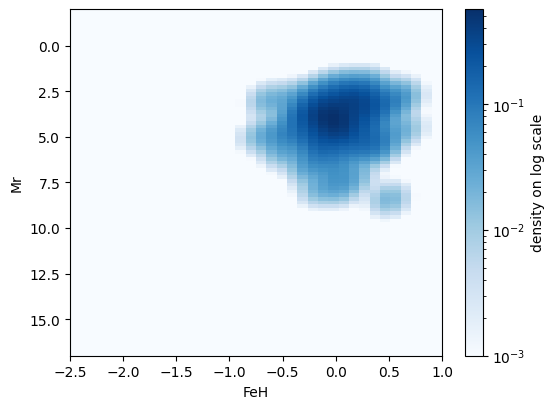

r= 16.5 to 17.5 N= 293952 Ns= 6656


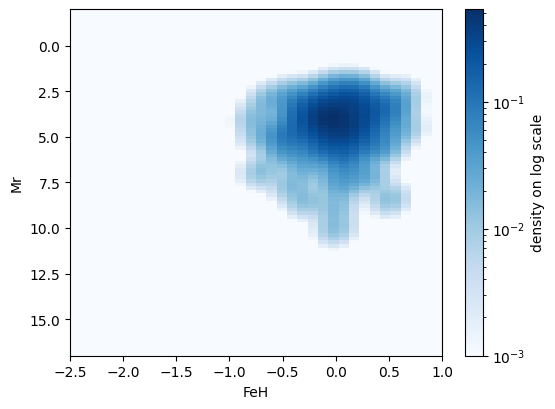

r= 17.0 to 18.0 N= 293952 Ns= 7904


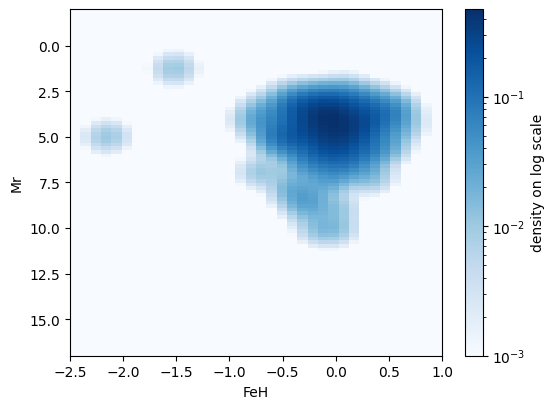

r= 17.5 to 18.5 N= 293952 Ns= 8640


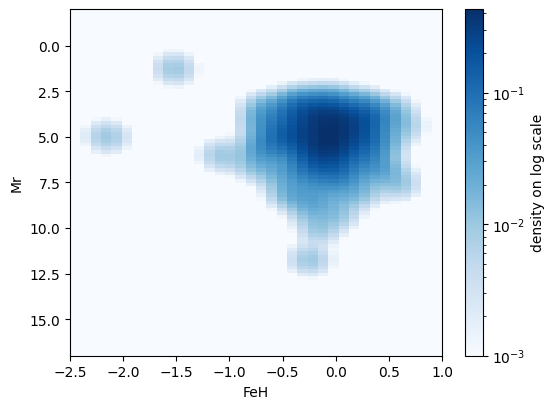

r= 18.0 to 19.0 N= 293952 Ns= 9504


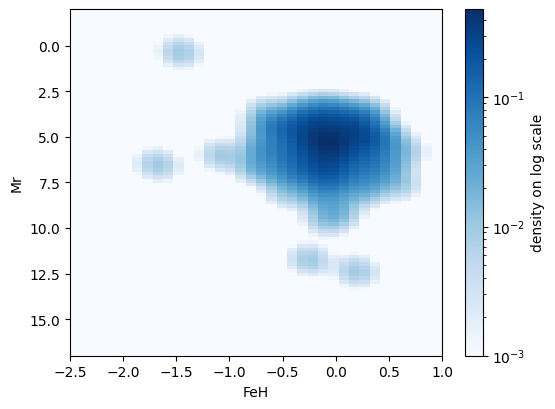

r= 18.5 to 19.5 N= 293952 Ns= 10048


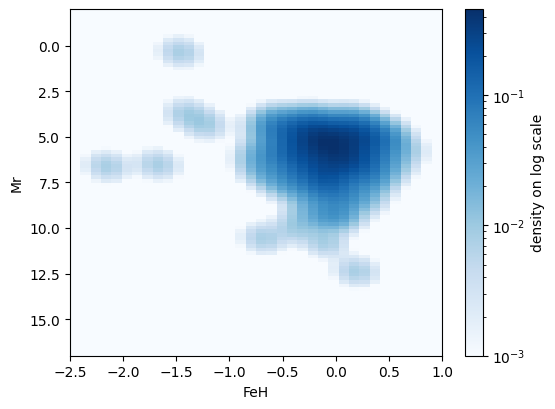

r= 19.0 to 20.0 N= 293952 Ns= 9888


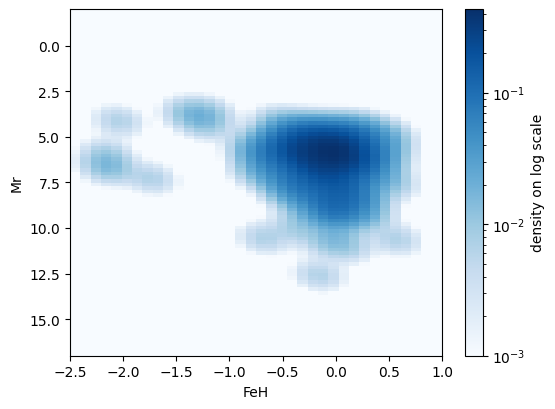

r= 19.5 to 20.5 N= 293952 Ns= 10848


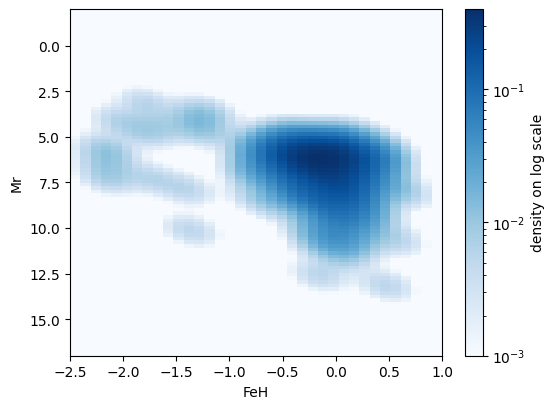

r= 20.0 to 21.0 N= 293952 Ns= 11584


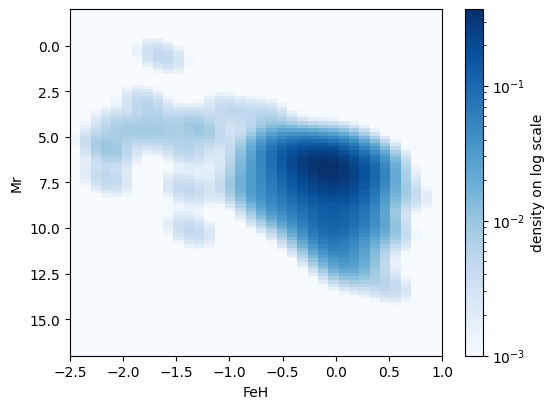

r= 20.5 to 21.5 N= 293952 Ns= 12672


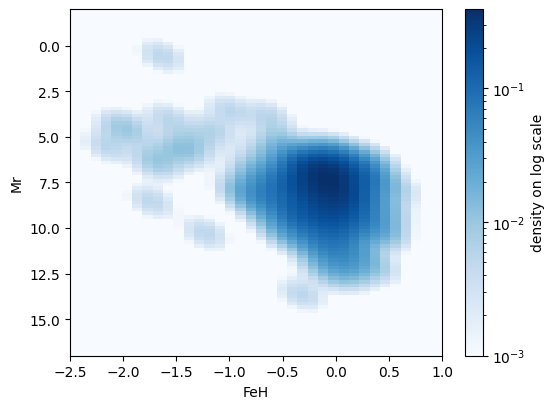

r= 21.0 to 22.0 N= 293952 Ns= 15328


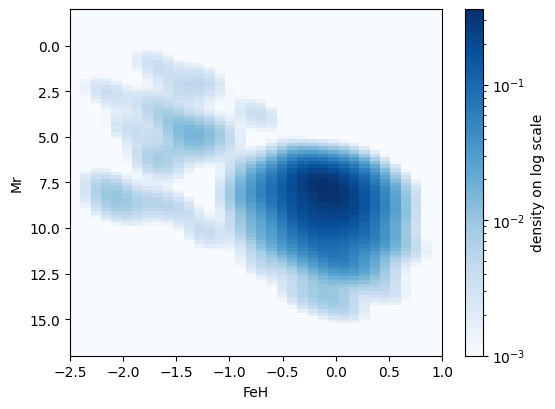

r= 21.5 to 22.5 N= 293952 Ns= 17024


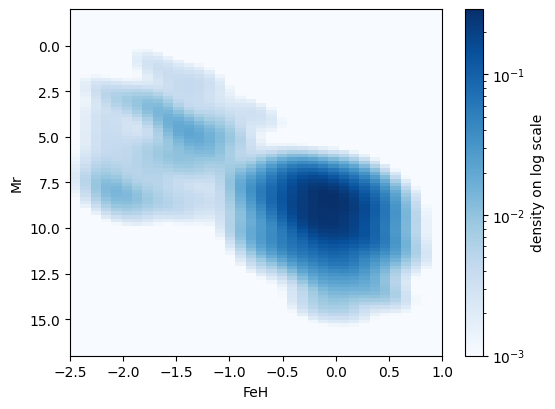

r= 22.0 to 23.0 N= 293952 Ns= 19488


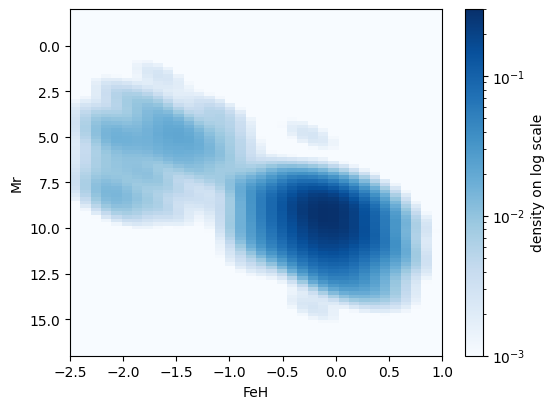

r= 22.5 to 23.5 N= 293952 Ns= 24288


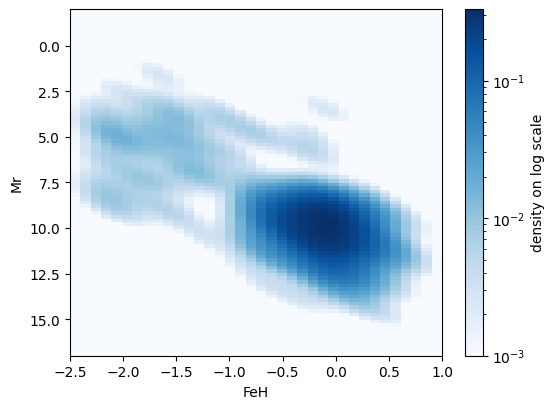

r= 23.0 to 24.0 N= 293952 Ns= 30112


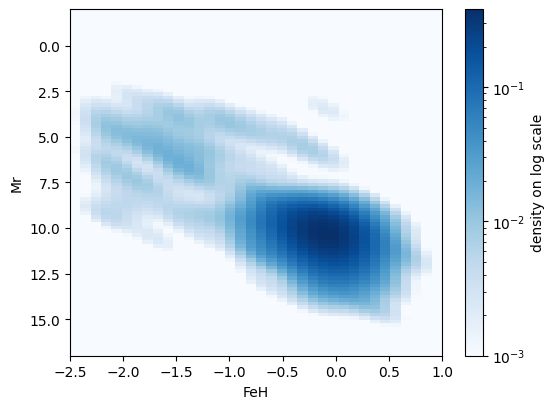

r= 23.5 to 24.5 N= 293952 Ns= 36224


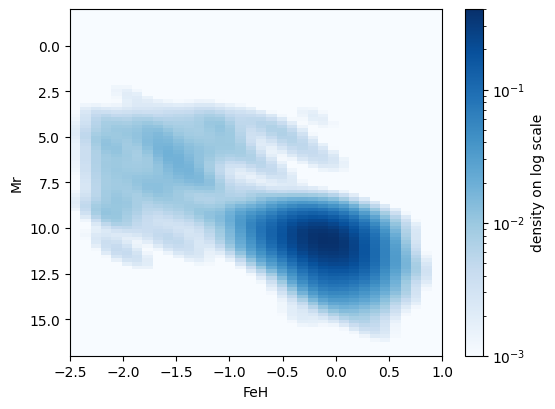

r= 24.0 to 25.0 N= 293952 Ns= 44864


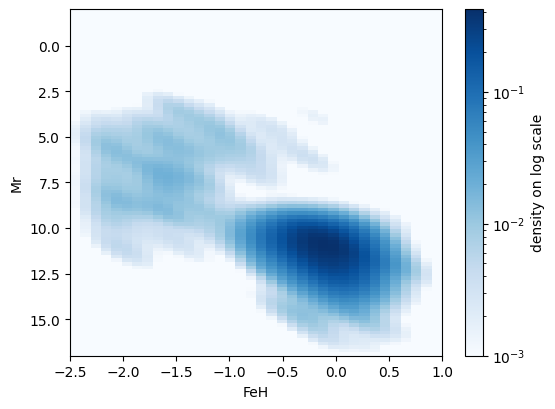

r= 24.5 to 25.5 N= 293952 Ns= 52448


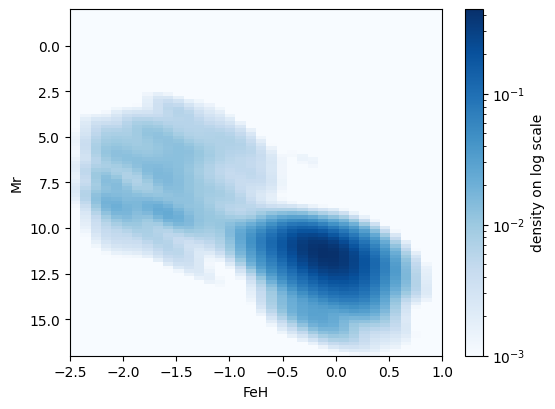

r= 25.0 to 26.0 N= 293952 Ns= 54208


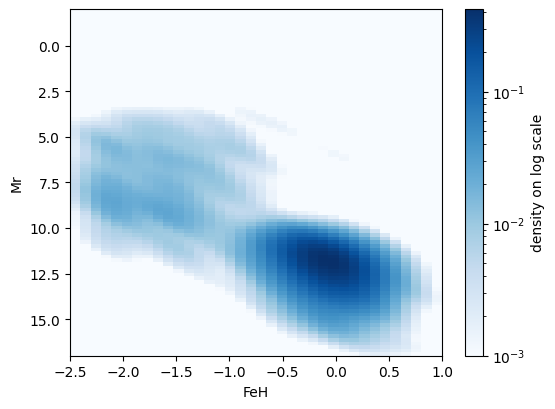

r= 25.5 to 26.5 N= 293952 Ns= 54304


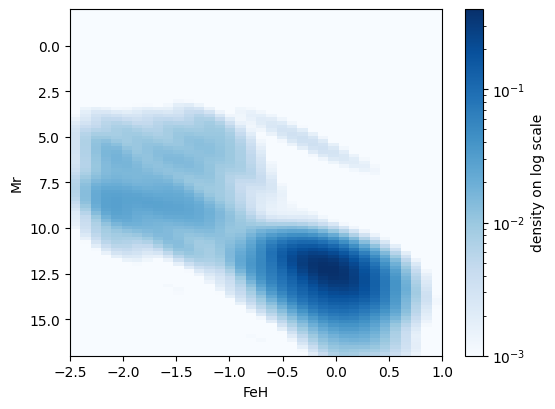

r= 26.0 to 27.0 N= 293952 Ns= 54336


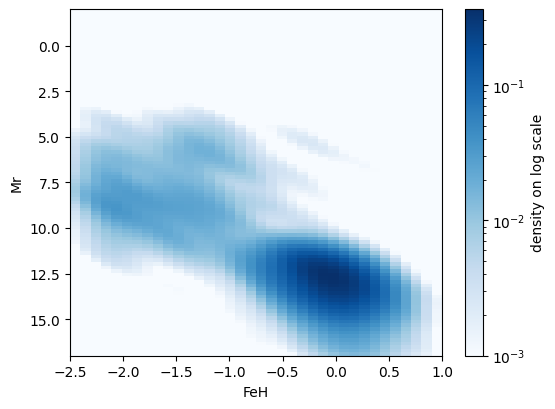

r= 26.5 to 27.5 N= 293952 Ns= 53376


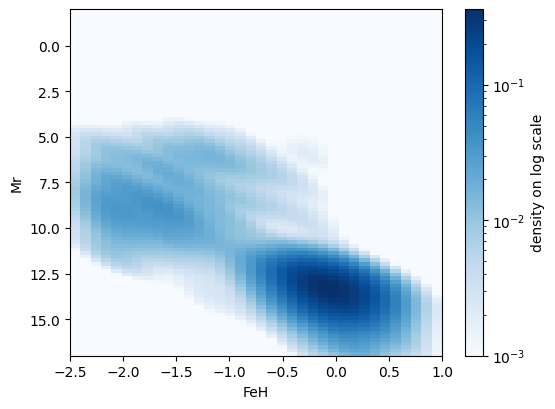

In [40]:
rootname = 'priorsDir/nested32'
bt.dumpPriorMaps(nested_patch, rootname)